In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

%matplotlib inline
sns.set()

In [11]:
NUM_EXAMPLES = 100
IMAGE_INDEX = 0

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
model = keras.models.load_model('mnist.h5')

In [5]:
inp = model.input
output = model.output.op.inputs[0]

In [6]:
func = keras.backend.function([inp], [output])

In [8]:
result = func([x_train[:NUM_EXAMPLES].reshape(-1,28,28,1)])

In [17]:
image = x_train[0]

In [41]:
def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions p with respect to q
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    return np.sum(np.where(p != 0, p * np.log((p / q) + 10), 0))

In [42]:
def genate_patched_imgs(ex, kernel_size, mean):
    rows = int(ex.shape[0]/kernel_size[0])
    cols = int(ex.shape[1]/kernel_size[1])
    print(f"generating {cols * rows} of patched images")
    for r in range(rows):
        for c in range(cols):
            image = ex.copy()
            row_slice = slice(r * kernel_size[0], (r + 1) * kernel_size[0])
            col_slice = slice(c * kernel_size[1], (c + 1) * kernel_size[1])
            image[row_slice, col_slice] = np.full(kernel_size, mean)
            yield image, (row_slice, col_slice)

In [54]:
gen = genate_patched_imgs(image,(4,4),0)

In [55]:
images, patches = zip(*gen)

generating 49 of patched images


In [56]:
images = np.array(images)

In [57]:
q_dist = func([image.reshape(-1,28,28,1)])[0]

In [58]:
p_dists = func([images.reshape(-1,28,28,1)])[0]

In [59]:
diff = [kl(p,q_dist) for p in p_dists]

In [60]:
mat = np.full_like(image,0)

In [61]:
for patch, dif in zip(patches, diff):
    mat[patch[0],patch[1]] = dif

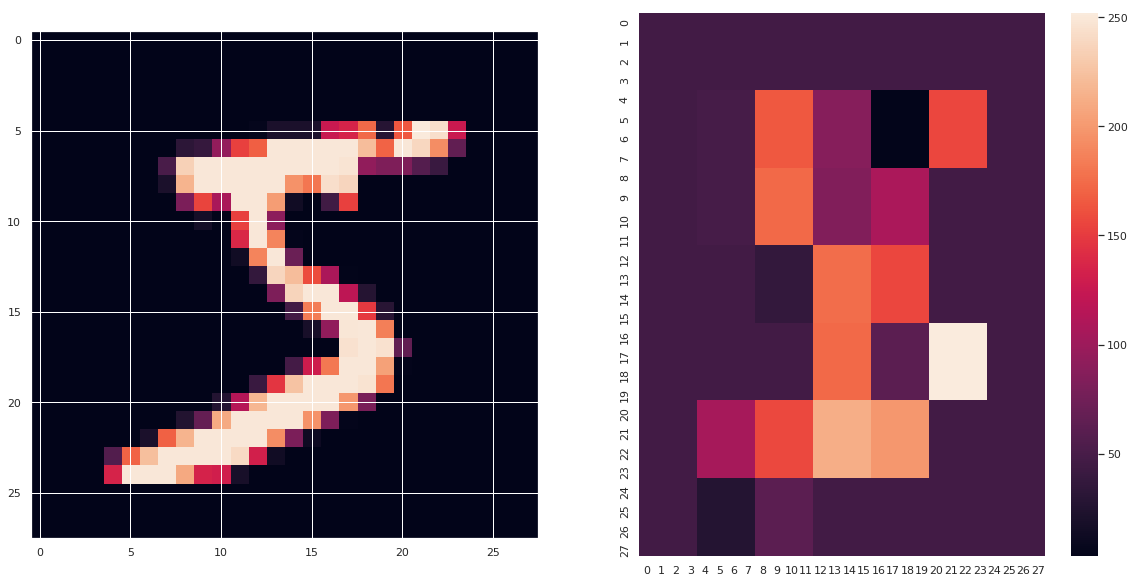

In [62]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.imshow(image)
sns.heatmap(mat,ax=ax2)

10000